<a href="https://colab.research.google.com/github/kodakar/DeepLearning_practice/blob/main/iris_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [4]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(iris.data)  # パラメータの計算
X = scaler.transform(iris.data)  # データの変換

y = np_utils.to_categorical(iris.target)  # ラベルをone-hot表現に変換

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(128, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(128, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(128, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(128, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               640       
                                                                 
 activation_26 (Activation)  (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 activation_27 (Activation)  (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 activation_28 (Activation)  (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)              

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0632 - accuracy: 0.9732
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9821
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9732
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9821
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 0.9643
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0587 - accuracy: 0.9732
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0581 - accuracy: 0.9643
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9643
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9732
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9643
Epoch 11/

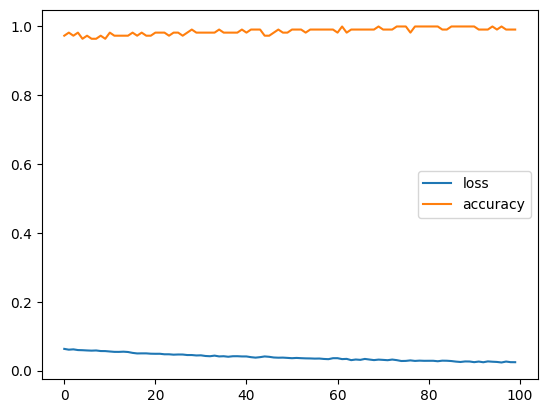

In [23]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.0927 - accuracy: 0.9737
0.09268679469823837 0.9736841917037964


In [26]:
model.predict(X_test)

2/2 [==============================] - 1s 10ms/step


array([[9.99614358e-01, 3.80602694e-04, 4.94839969e-06],
       [4.80565970e-04, 5.38593903e-02, 9.45660055e-01],
       [1.90670753e-03, 9.97045457e-01, 1.04786386e-03],
       [6.04615889e-06, 2.16035842e-04, 9.99777973e-01],
       [9.99839187e-01, 1.57333066e-04, 3.40945098e-06],
       [4.86803212e-04, 9.87697184e-01, 1.18160360e-02],
       [4.67858490e-06, 1.27435909e-04, 9.99867916e-01],
       [1.48245506e-03, 9.96229112e-01, 2.28837435e-03],
       [5.67766081e-04, 9.93025541e-01, 6.40669279e-03],
       [9.56066060e-07, 1.76164795e-05, 9.99981403e-01],
       [1.87931837e-05, 1.30508363e-03, 9.98676121e-01],
       [2.45463652e-05, 8.14641593e-04, 9.99160767e-01],
       [8.35933955e-04, 9.98788416e-01, 3.75662610e-04],
       [2.32683778e-05, 7.11934350e-04, 9.99264777e-01],
       [4.00933386e-05, 1.18584151e-03, 9.98773992e-01],
       [9.99240398e-01, 7.50169624e-04, 9.37246205e-06],
       [6.53411786e-04, 5.82515419e-01, 4.16831106e-01],
       [7.94349835e-05, 3.79630

In [27]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')